In [293]:
GOAL = 100
P = 0.49

0.49

In [294]:
function action_value(state::Int64, action::Int64, values::Array{Float64}, GOAL::Int64, P::Float64)
    win_state, lose_state = state + action, state - action
    return P * values[win_state + 1] + (1 - P) * values[lose_state + 1]
end 

action_value (generic function with 4 methods)

In [295]:
function iter_value_iteration!(
    values::Array{Float64},
    GOAL::Int64 = GOAL,
    P::Float64 = P,
)
    delta = 0.0
    # We only need to loop over the values of the non-terminal states.
    for state in 1:(GOAL - 1)
        oldval = values[state + 1]
        possible_values = [
            action_value(state, action, values, P, GOAL)
            for action=1:min(state, GOAL - state)
        ]
        values[state + 1] = maximum(possible_values)
        delta = max(delta, abs(oldval - values[state + 1]))
    end
    return delta
end

iter_value_iteration! (generic function with 7 methods)

In [296]:
function optimal_policy(
    values::Array{Float64},
    GOAL::Int64 = GOAL,
    P::Float64 = P
)
    policy = zeros(Int64, GOAL + 1)
    for state in 1:(GOAL - 1)
        possible_values = [
            action_value(state, action, values, P, GOAL)
            for action=1:min(state, GOAL - state)
        ]
        # The rounding here forces the argmax to pick the minimal bet in the case of ties.
        policy[state + 1] = argmax(round.(possible_values, digits=6))
        #policy[state + 1] = argmax(possible_values)
    end
    return policy
end

optimal_policy (generic function with 3 methods)

In [297]:
function value_iteration(
    GOAL::Int64 = GOAL,
    P::Float64 = P,
    tol::Float64 = 0.000001    
)
    values = zeros(Float64, GOAL + 1)
    values[end] = 1
    delta = Inf
    while delta > tol
        delta = iter_value_iteration!(values, GOAL, P)
    end
    return optimal_policy(values), values
end

value_iteration (generic function with 4 methods)

In [298]:
policy, values = value_iteration()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9  …  9, 8, 7, 6, 5, 4, 3, 2, 1, 0], [0.0, 0.00867546241263796, 0.01770504432924377, 0.026999418418607243, 0.036132760937111104, 0.04549490220183196, 0.05510087932080692, 0.06439515400406101, 0.07374034743241785, 0.0832893208975688  …  0.90292619033882, 0.9133649241895236, 0.9240373520330568, 0.9347924439042451, 0.9451669102926017, 0.955816111336657, 0.966744146391165, 0.9774662167816951, 0.9885077705586645, 1.0])

In [299]:
using Plots
default(legend = false)

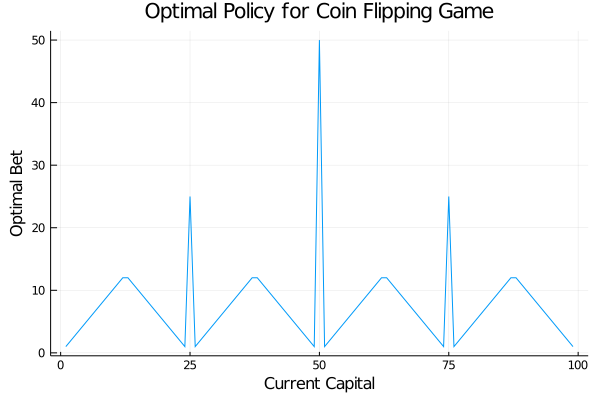

In [300]:
policy_plot = plot(policy[2:end-1])
title!(policy_plot, "Optimal Policy for Coin Flipping Game")
xlabel!(policy_plot, "Current Capital")
ylabel!(policy_plot, "Optimal Bet")

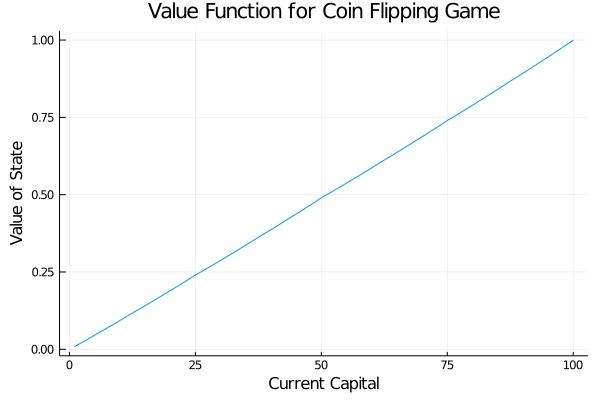

In [301]:
value_plot = plot(values[2:end])
title!(value_plot, "Value Function for Coin Flipping Game")
xlabel!(value_plot, "Current Capital")
ylabel!(value_plot, "Value of State")

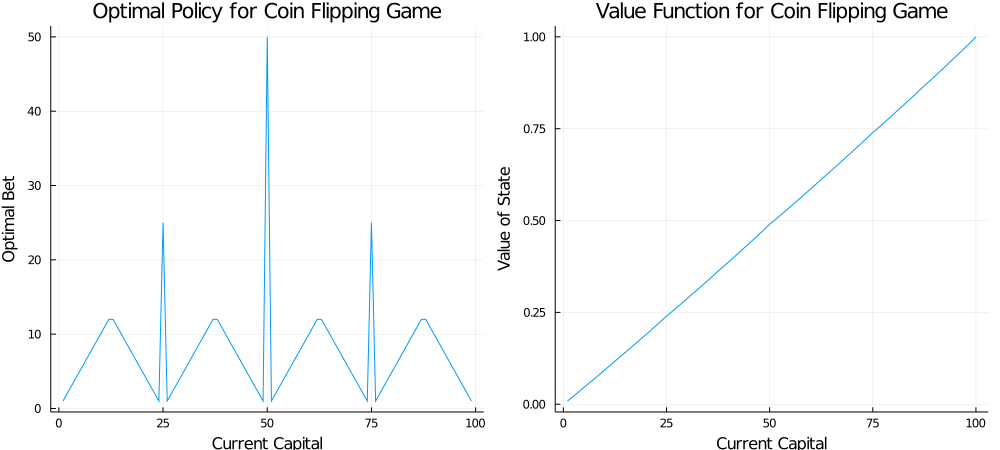

In [302]:
plot(policy_plot, value_plot, layout=2, size=(1000, 450))